# Train Bayesian Neural Network to predict brownian motion with negligible noise. As you'll see, forward prediction is somewhat easier.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from brownian_datagen import BrownianDatagen, create_dataholder_for_windows_and_targets
from bayesian_varinf import train_fb_n_times, load_learning_curves

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

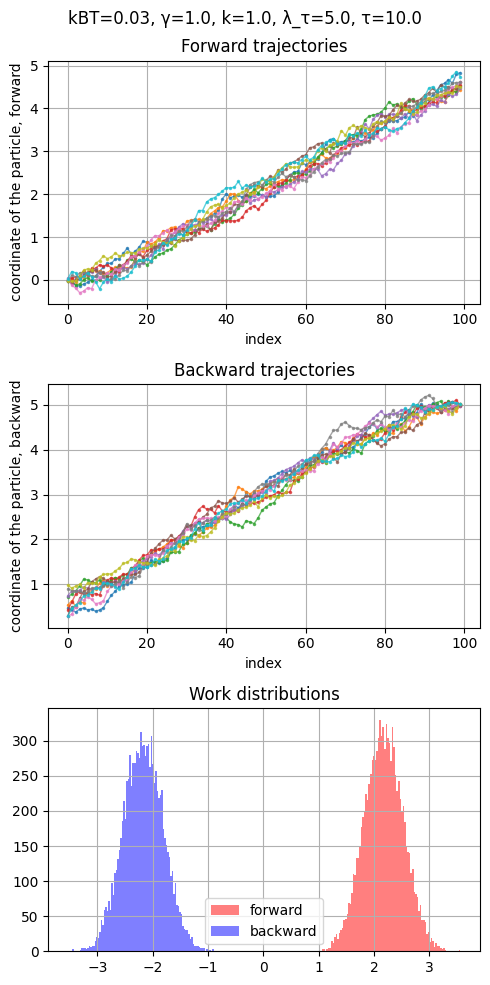

In [3]:
brownian = BrownianDatagen(kBT=0.03, γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=100, rng_seed=42)
brownian.visualize()

In [4]:
save_dir_prefix = "20230724_preds/brownian_varinf_debugged/test8/"
num_runs = 200
train_fb_n_times(dt, num_runs=num_runs,
                 num_epochs=4000, save_metrics_every_n_epochs=100,
                 hidden_size=6, train_test_split_ratio=0.5,
                 save_dir_prefix=save_dir_prefix)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 210346.24it/s]


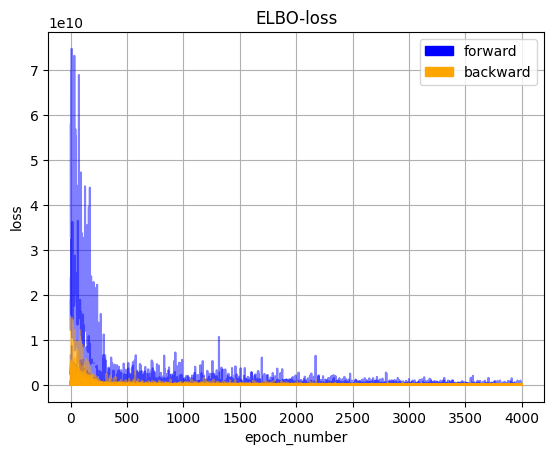

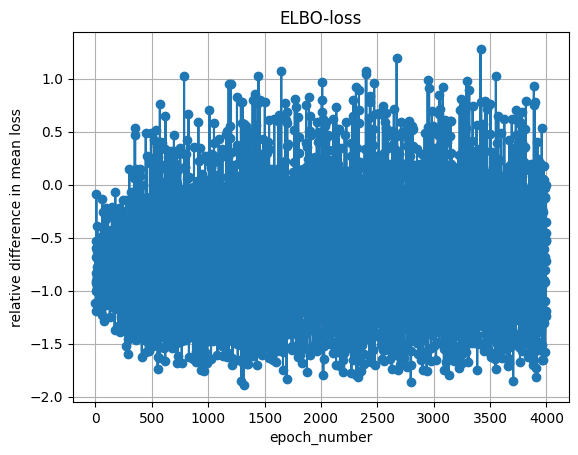

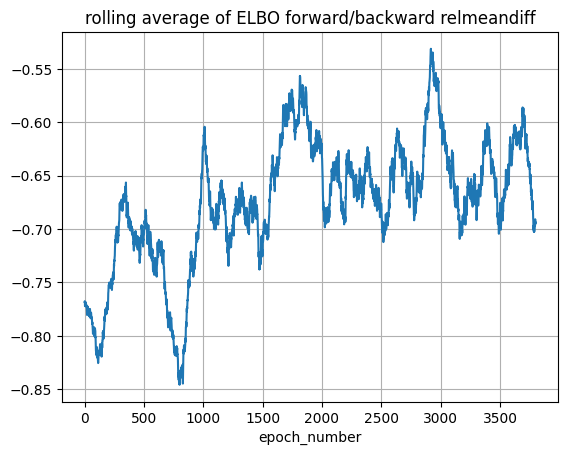

In [5]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric=None)
l.plot_learning_curves(log_scale=False)
l.plot_relmeandiff_vs_epoch()

plt.plot(np.convolve(l.relmeandiff_all(), np.ones(200)/200, mode="valid"))
plt.title("rolling average of ELBO forward/backward relmeandiff")
plt.grid()
plt.xlabel("epoch_number")
plt.show()

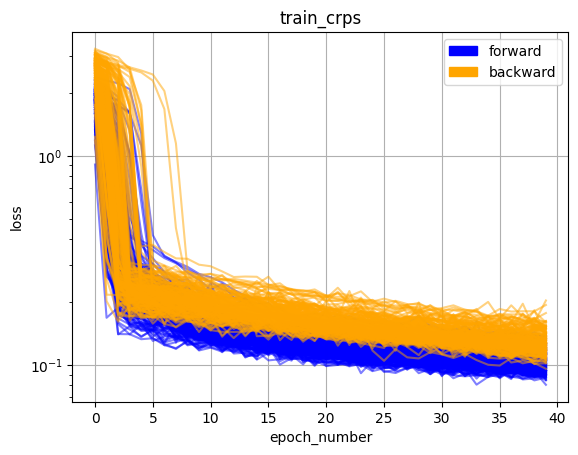

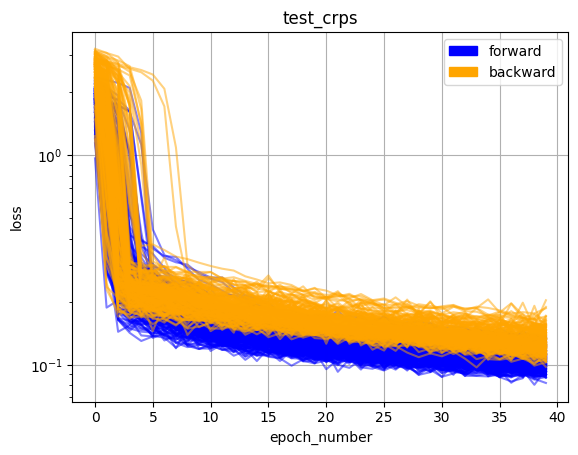

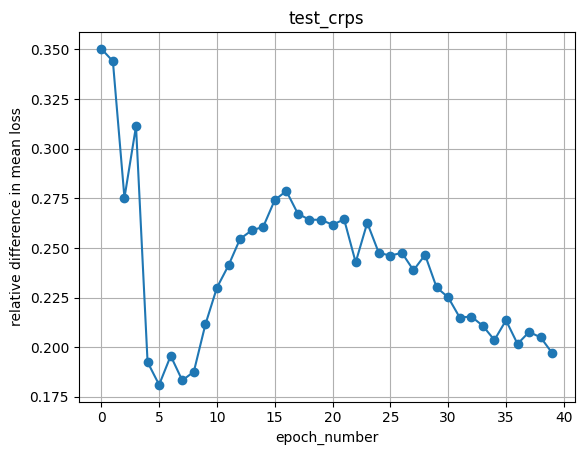

In [6]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="train_crps")
l.plot_learning_curves()
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_crps")
l.plot_learning_curves()
l.plot_relmeandiff_vs_epoch()

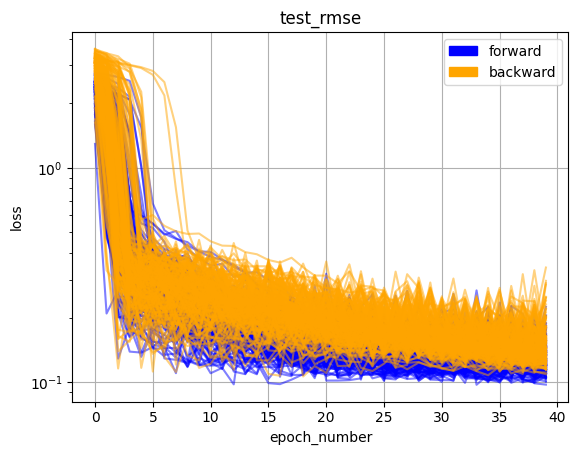

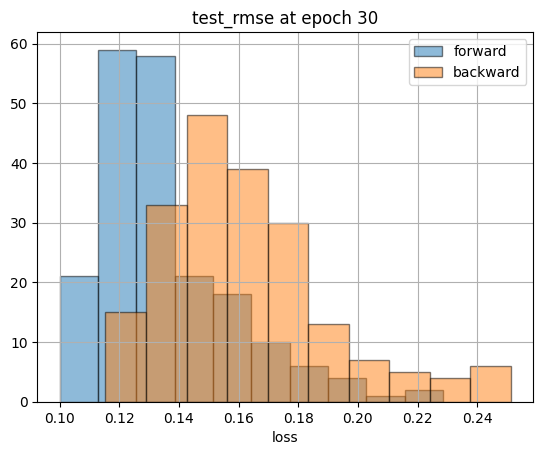

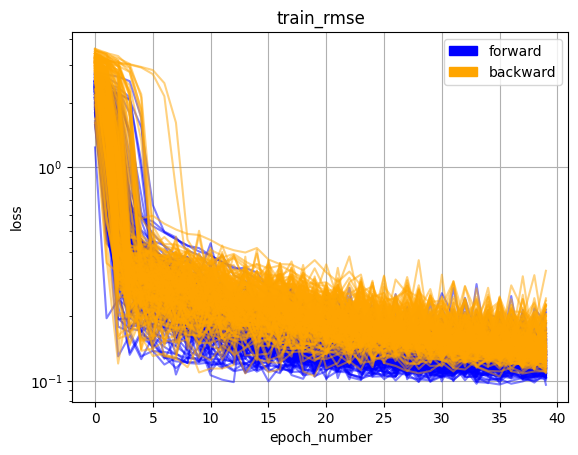

In [7]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_rmse")
l.plot_learning_curves()
l.plot_distribution_at_epoch(30)
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="train_rmse")
l.plot_learning_curves(log_scale=True)

### Conclusions:

- forward prediction is easier to learn that backward, the difference is not astonishing but significant
- ELBO loss yielded most significant forward-backward difference (65%)
- CRPS was least noisy metric 
- test and train metrics look exactly the same, probably because the train and test datasets are very similar

For completeness, let's explore the more exotic metrics now:

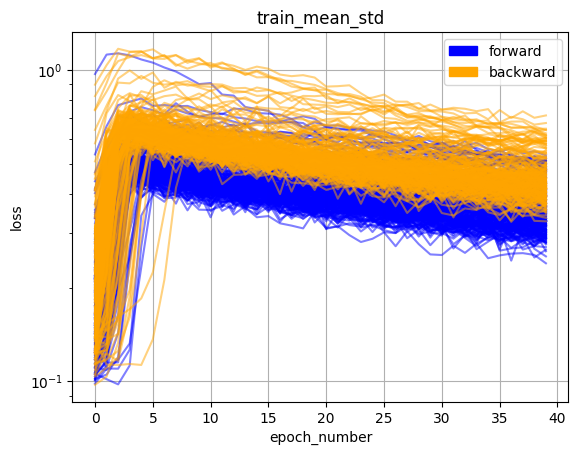

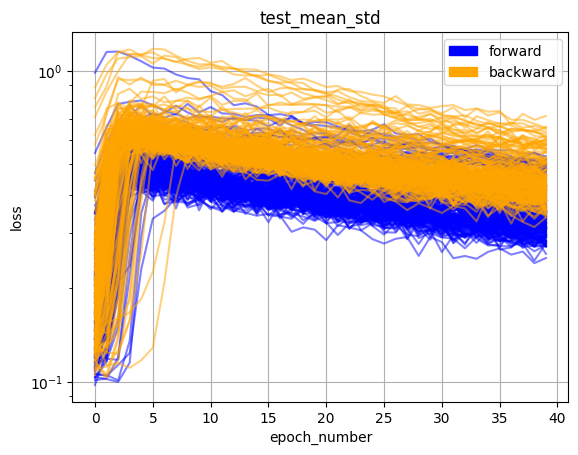

In [8]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="train_mean_std")
l.plot_learning_curves()
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_mean_std")
l.plot_learning_curves()

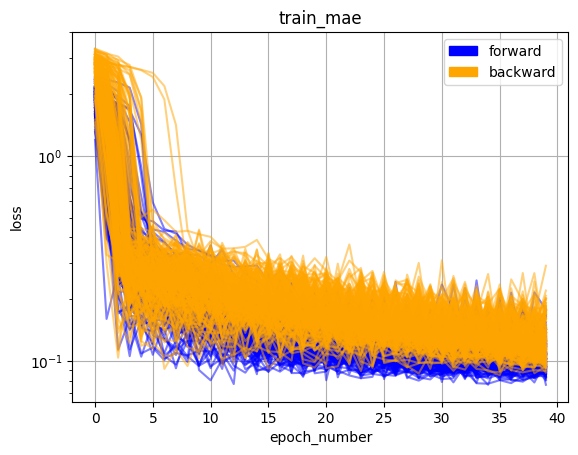

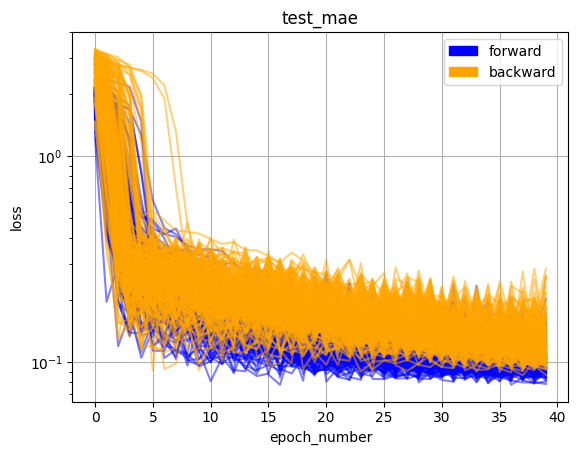

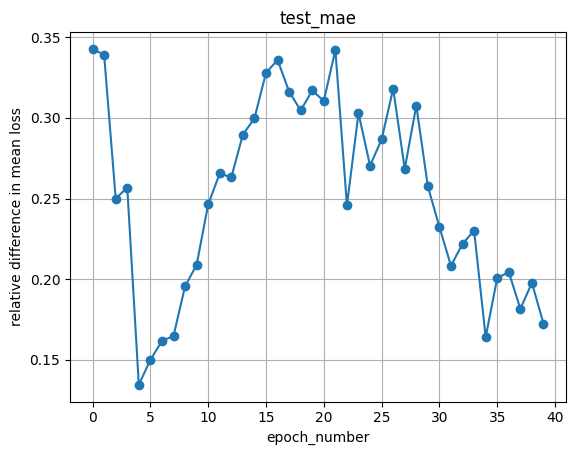

In [9]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="train_mae")
l.plot_learning_curves()
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_mae")
l.plot_learning_curves()
l.plot_relmeandiff_vs_epoch()

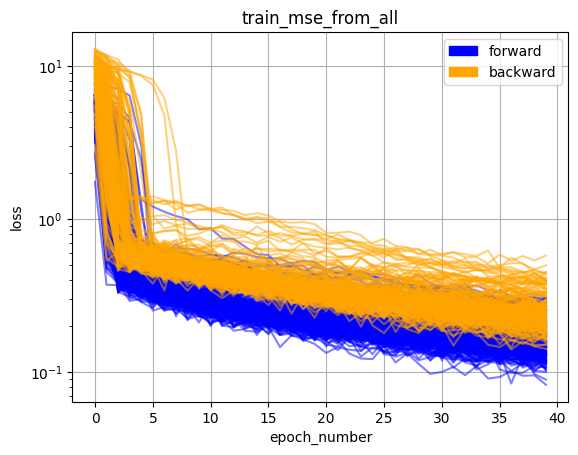

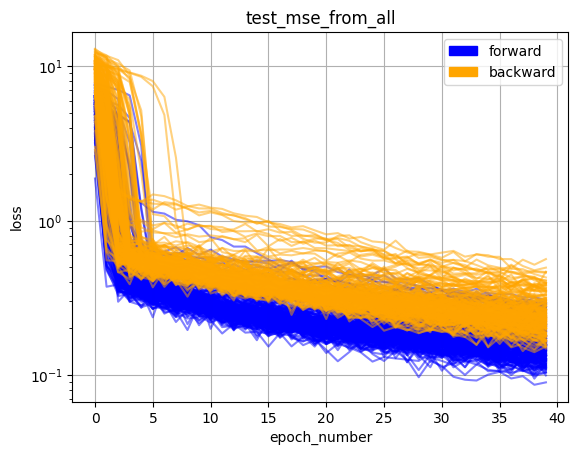

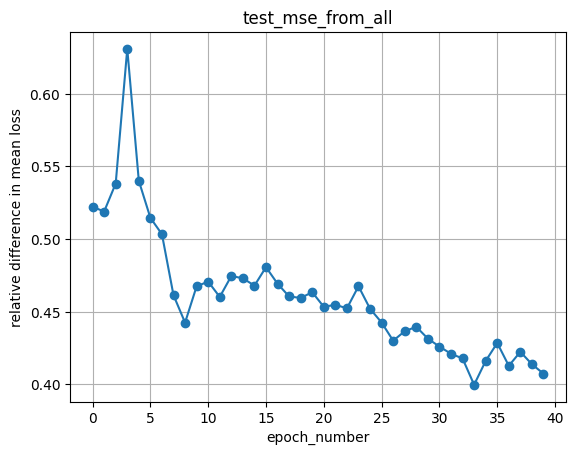

In [10]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="train_mse_from_all")
l.plot_learning_curves()
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, alt_metric="test_mse_from_all")
l.plot_learning_curves()
l.plot_relmeandiff_vs_epoch()